# 1 Load libraries

# 1 Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import itertools
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import roc_auc_score

#Random Forest
import sklearn.ensemble as ensemble
from sklearn.model_selection import GridSearchCV

# 2 Load datasets

In [2]:
train = pd.read_csv('data/train_after_missing_value_without_dropping_rows.csv')
test = pd.read_csv('data/test_after_missing_value_without_dropping_rows.csv')

In [3]:
train.fillna(999,inplace=True)
test.fillna(999,inplace=True)

In [4]:
print(train.shape)
print(test.shape)

(590540, 289)
(506691, 289)


In [5]:
import re
train = train.rename(columns = lambda x:re.sub(':', '', x))
test = test.rename(columns = lambda x:re.sub(':', '', x))

Train / Validation Split

In [6]:
y = pd.DataFrame(train['isFraud'])
X = train.drop(columns=['isFraud'])
X_test = test.drop(columns=['isFraud'])

In [7]:
# index_array = np.arange(len(X))
# val_index = index_array[random.sample(range(0,X.shape[0]), X.shape[0]//5)]
# train_index = np.delete(index_array[:X.shape[0]], val_index, axis=0)
# len(train_index), len(val_index)

# X_train, X_val = X.iloc[train_index], X.iloc[val_index]
# y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# 3 Modeling
## 3.1 Random Forest
### 3.1.1 Training

In [9]:
train.fillna(999,inplace=True)
train.isnull().sum().sum()

0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

param_grid = {
    'criterion':['entropy'],
    'max_depth':[10], # >   
    'n_estimators':[14],  # >  
    'max_features':[0.4], # >  
    'min_samples_split':[6]  
}

rfc = ensemble.RandomForestClassifier()
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv=4)
rfc_cv.fit(X_train, y_train)

test_est = rfc_cv.predict(X_test)
print('RandomForest...')
print(metrics.classification_report(y_test, test_est))
print('RandomForest AUC...')
fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, test_est) # roc
print('AUC = %.4f' %metrics.auc(fpr_test, tpr_test))

rfc_cv.best_params_

C:\Users\18025\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\18025\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\18025\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\18025\AppData\Roaming\Python\Python310\site-packages\sklearn\mod

RandomForest...
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    170910
         1.0       0.91      0.33      0.48      6252

    accuracy                           0.98    177162
   macro avg       0.94      0.66      0.74    177162
weighted avg       0.97      0.98      0.97    177162

RandomForest AUC...
AUC = 0.6645


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.4,
 'min_samples_split': 6,
 'n_estimators': 14}

### 3.3.2 Confusion matrix

In [11]:
metrics.accuracy_score(y_test, test_est.round())*100


97.52542870367235

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
acc = accuracy_score(y_test, test_est.round())
auc = roc_auc_score(y_test, test_est.round())
rec = recall_score(y_test, test_est.round())
prec = precision_score(y_test, test_est.round())
f1 = f1_score(y_test, test_est.round())
print('accuracy =', round(acc, 4))
print('auc score =', round(auc, 4))
print('recall =',round(rec, 4))
print('precision =', round(prec, 4))
print('f1 score =', round(f1, 4))

accuracy = 0.9753
auc score = 0.6645
recall = 0.3301
precision = 0.9133
f1 score = 0.485


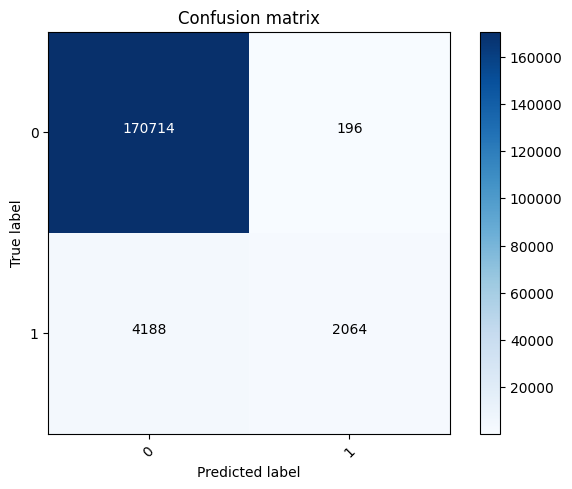

In [14]:
confusion_mtx = confusion_matrix(y_test, test_est.round()) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 